In [1]:
import numpy as np
import cv2
import scipy
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
imagen=cv2.imread('Koala.jpg')

In [3]:
imagen_RGB=cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
#Pasamos la imágen a matriz
imagen_array=np.array(imagen_RGB)

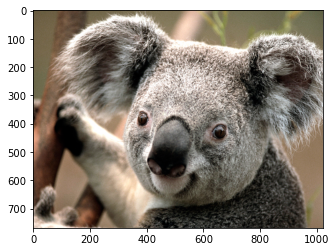

In [4]:
plt.imshow(imagen_array)
plt.show()

In [5]:
imagen_array.shape

(768, 1024, 3)

In [6]:
imagen_array.dtype

dtype('uint8')

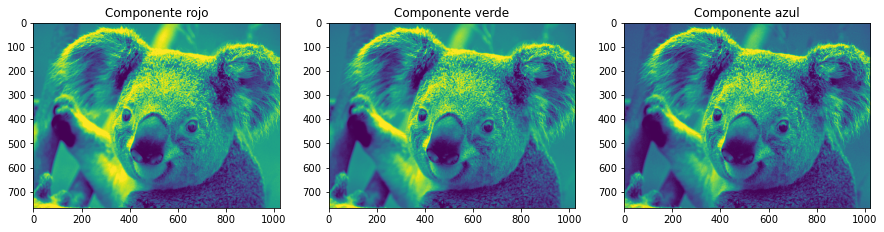

In [7]:
plt.figure(figsize=([15,12]))

plt.subplot(1,3,1), plt.imshow(imagen_array[:,:,0]),
plt.title('Componente rojo')
plt.subplot(1,3,2), plt.imshow(imagen_array[:,:,1]),
plt.title('Componente verde')
plt.subplot(1,3,3), plt.imshow(imagen_array[:,:,2]),
plt.title('Componente azul')

plt.show()

In [81]:
#Normalización
normalizada=cv2.normalize(imagen_array,-1, 1, cv2.NORM_MINMAX, dtype=cv2.CV_32F)

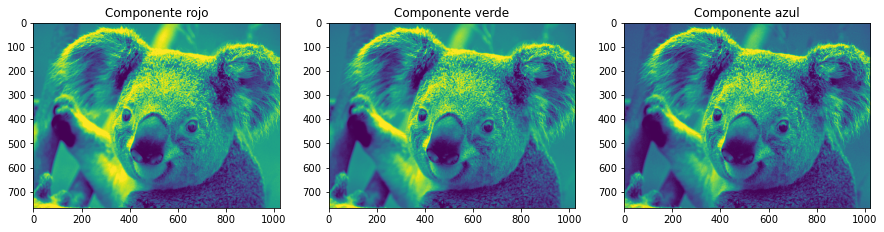

In [82]:
#Graficamos las imágenes normalizadas
plt.figure(figsize=([15,12]))

plt.subplot(1,3,1), plt.imshow(normalizada[:,:,0]),
plt.title('Componente rojo')
plt.subplot(1,3,2), plt.imshow(normalizada[:,:,1]),
plt.title('Componente verde')
plt.subplot(1,3,3), plt.imshow(normalizada[:,:,2]),
plt.title('Componente azul')

plt.show()

In [83]:
(normalizada.min(), normalizada.max())

(0.0, 0.0012799914)

In [84]:
#Matriz de rgb a yiq
matriz_yiq=np.array([[0.299, 0.587, 0.114],[0.595716, -0.274453, -0.321263], [0.211456, -0.522591, 0.311135]])
matriz_yiq

array([[ 0.299   ,  0.587   ,  0.114   ],
       [ 0.595716, -0.274453, -0.321263],
       [ 0.211456, -0.522591,  0.311135]])

In [85]:
#Matriz de YIQ a RGB
matriz_rgb=np.array([[1, 0.9563, 0.6210], [1, -0.2721, -0.6474], [1, -1.1070, 1.7046]])
matriz_rgb

array([[ 1.    ,  0.9563,  0.621 ],
       [ 1.    , -0.2721, -0.6474],
       [ 1.    , -1.107 ,  1.7046]])

In [86]:
#Cambio de espacio de color
yiq=np.zeros([normalizada.shape[0],normalizada.shape[1], normalizada.shape[2]])

for i in range(normalizada.shape[0]):
    for j in range(normalizada.shape[1]):
        yiq[i,j,:]=np.dot(matriz_yiq,normalizada[i,j,:])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Nueva imagen')

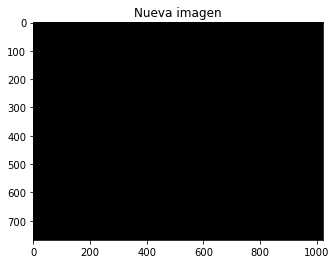

In [87]:
plt.imshow(yiq)
plt.title('Nueva imagen')

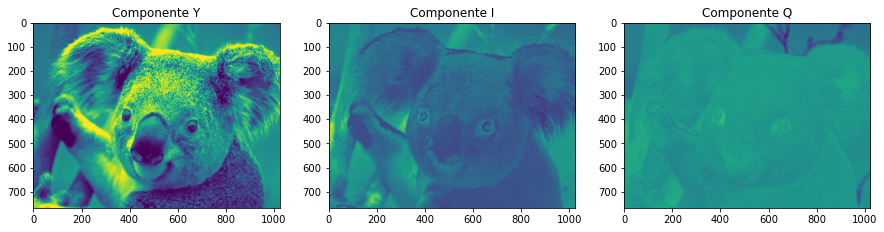

In [88]:
plt.figure(figsize=([15,12]))

plt.subplot(1,3,1), plt.imshow(yiq[:,:,0]),
plt.title('Componente Y')
plt.subplot(1,3,2), plt.imshow(yiq[:,:,1]),
plt.title('Componente I')
plt.subplot(1,3,3), plt.imshow(yiq[:,:,2]),
plt.title('Componente Q')

plt.show()

In [89]:
#Luminancia oscura
y_bajo=np.zeros([yiq.shape[0],yiq.shape[1],yiq.shape[2]])


for i in range(y_bajo.shape[0]):
    for j in range(y_bajo.shape[1]):
        y_bajo[i,j,:][0]=yiq[i,j,:][0]*0.4
        y_bajo[i,j,:][1]=yiq[i,j,:][1]
        y_bajo[i,j,:][2]=yiq[i,j,:][2]

In [90]:
#Cambio a rgb
for i in range(y_bajo.shape[0]):
    for j in range(y_bajo.shape[1]):
        y_bajo[i,j,:]=np.dot(matriz_rgb,y_bajo[i,j,:])

In [91]:
#Paso a bits
oscuro=cv2.normalize(y_bajo,0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_32F)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Nueva imagen')

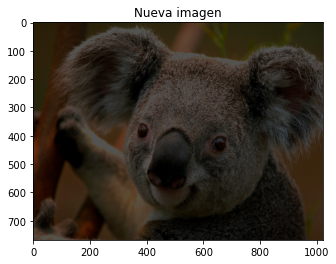

In [92]:
plt.imshow(oscuro)
plt.title('Nueva imagen')

In [20]:
#La importancia de la información perceptual 
#que transmite cada uno de esos valores es aproximadamente 80% Y, 15% I, y 5% Q

In [93]:
#Cambio de espacio de color
yiq=np.zeros([normalizada.shape[0],normalizada.shape[1], normalizada.shape[2]])

for i in range(normalizada.shape[0]):
    for j in range(normalizada.shape[1]):
        yiq[i,j,:]=np.dot(matriz_yiq,normalizada[i,j,:])

In [94]:
#Luminancia mas clara
y_alto=np.zeros([yiq.shape[0],yiq.shape[1],yiq.shape[2]])


for i in range(y_alto.shape[0]):
    for j in range(y_alto.shape[1]):
        y_alto[i,j,:][0]=yiq[i,j,:][0]*1.4
        y_alto[i,j,:][1]=yiq[i,j,:][1]
        y_alto[i,j,:][2]=yiq[i,j,:][2]

In [95]:
#Cambio a rgb
for i in range(y_alto.shape[0]):
    for j in range(y_alto.shape[1]):
        y_alto[i,j,:]=np.dot(matriz_rgb,y_alto[i,j,:])

In [96]:
#Paso a bits
claro=cv2.normalize(y_alto,0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_32F)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


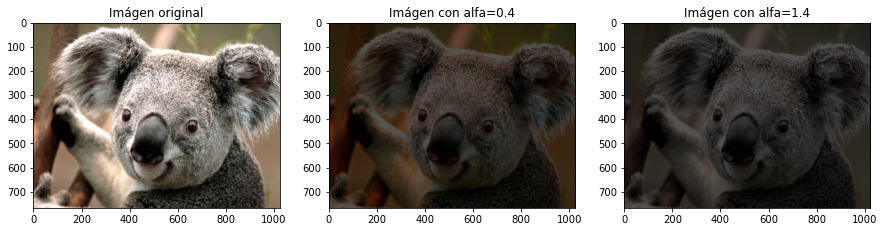

In [97]:
plt.figure(figsize=([15,12]))

plt.subplot(1,3,1), plt.imshow(imagen_array),
plt.title('Imágen original')
plt.subplot(1,3,2), plt.imshow(oscuro),
plt.title('Imágen con alfa=0.4')
plt.subplot(1,3,3), plt.imshow(claro),
plt.title('Imágen con alfa=1.4')
plt.show()

In [26]:
(oscuro[:,:,0].min(), oscuro[:,:,0].max())

(-0.013114927, 0.43279275)

In [27]:
(claro[:,:,0].min(), claro[:,:,0].max())

(0.0, 0.32550982)

In [64]:
#Cambio de espacio de color
yiq=np.zeros([normalizada.shape[0],normalizada.shape[1], normalizada.shape[2]])

for i in range(normalizada.shape[0]):
    for j in range(normalizada.shape[1]):
        yiq[i,j,:]=np.dot(matriz_yiq,normalizada[i,j,:])

In [65]:
#Crominancia
i_bajo=np.zeros([yiq.shape[0],yiq.shape[1],yiq.shape[2]])


for i in range(i_bajo.shape[0]):
    for j in range(i_bajo.shape[1]):
        i_bajo[i,j,:][0]=yiq[i,j,:][0]
        i_bajo[i,j,:][1]=yiq[i,j,:][1]*0.5
        i_bajo[i,j,:][2]=yiq[i,j,:][2]*0.5

In [66]:
#Cambio a rgb
for i in range(i_bajo.shape[0]):
    for j in range(i_bajo.shape[1]):
        i_bajo[i,j,:]=np.dot(matriz_rgb,i_bajo[i,j,:])

In [75]:
#Paso a bits
i=cv2.normalize(i_bajo,0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_32F)

In [68]:
#Cambio de espacio de color
yiq=np.zeros([normalizada.shape[0],normalizada.shape[1], normalizada.shape[2]])

for i in range(normalizada.shape[0]):
    for j in range(normalizada.shape[1]):
        yiq[i,j,:]=np.dot(matriz_yiq,normalizada[i,j,:])

In [69]:
#Crominancia
i_alto=np.zeros([yiq.shape[0],yiq.shape[1],yiq.shape[2]])


for i in range(i_alto.shape[0]):
    for j in range(i_alto.shape[1]):
        i_alto[i,j,:][0]=yiq[i,j,:][0]
        i_alto[i,j,:][1]=yiq[i,j,:][1]*1.5
        i_alto[i,j,:][2]=yiq[i,j,:][2]*1.5

In [70]:
#Cambio a rgb
for i in range(i_alto.shape[0]):
    for j in range(i_alto.shape[1]):
        i_alto[i,j,:]=np.dot(matriz_rgb,i_alto[i,j,:])

In [71]:
#Paso a bits
ii=cv2.normalize(i_alto,0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_32F)

In [72]:
imagen_array.shape

(768, 1024, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


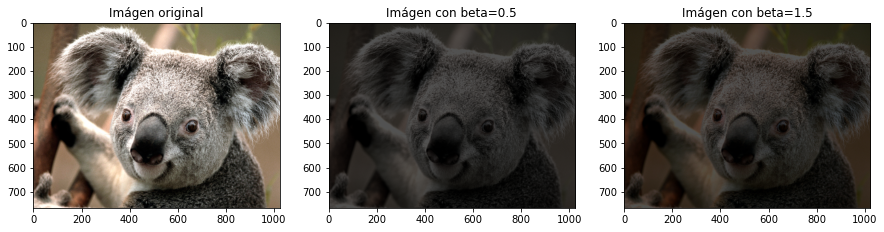

In [76]:
plt.figure(figsize=([15,12]))

plt.subplot(1,3,1), plt.imshow(imagen_array),
plt.title('Imágen original')
plt.subplot(1,3,2), plt.imshow(i),
plt.title('Imágen con beta=0.5')
plt.subplot(1,3,3), plt.imshow(ii),
plt.title('Imágen con beta=1.5')
plt.show()

In [79]:
yiq[:,:,:][0].max()

0.0009976152095478028

In [80]:
yiq[:,:,:][0].min()

-9.751197339181094e-05